In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv("Project_finaldata.csv")

In [3]:
df.head()

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Bldg Type,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NAS,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,0.0,0.0,6.0,5,1960,1960,112.0,3.0,4.0,5.0,2.0,1.0,1.0,639.0,6.0,0.0,441.0,1080.0,1.0,1.0,1656,0,0,1656,1.0,0.0,1,0,3,1,4.0,7,2,1960.0,0.0,2.0,528.0,5.0,5.0,1.0,210,62,0,0,0,0,0,5,2010,215000.0,0,0,0,0,1,0,0,1,1,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 224 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(29), int64(195)
memory usage: 4.5 MB


In [5]:
#Create  and y 
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
base_elastic_model = ElasticNet(max_iter=250000)

In [7]:
param_grid = {'alpha':[0.1,1,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.9,1]}

In [8]:
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)

In [9]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .

[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] a

[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.9min finished


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=250000),
             param_grid={'alpha': [0.1, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [10]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [11]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=250000)

In [12]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.108462,0.016175,0.000898,0.000537,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-4.873574e+08,-4.432229e+08,-6.765331e+08,-3.364979e+08,-3.460484e+08,-5.508047e+08,-3.878831e+08,-4.578975e+08,-4.819824e+08,-3.818579e+08,-4.550085e+08,9.795166e+07,4
1,0.107619,0.012026,0.000797,0.000399,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-4.846336e+08,-4.425719e+08,-6.599765e+08,-3.405203e+08,-3.522323e+08,-5.581000e+08,-3.865347e+08,-4.632393e+08,-4.727234e+08,-3.874708e+08,-4.548003e+08,9.325969e+07,3
2,0.106933,0.011566,0.000897,0.000299,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-4.834319e+08,-4.434002e+08,-6.509215e+08,-3.450350e+08,-3.570031e+08,-5.640352e+08,-3.862206e+08,-4.664766e+08,-4.689519e+08,-3.929455e+08,-4.558421e+08,9.045064e+07,6
3,0.224126,0.034311,0.001096,0.000536,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-4.818211e+08,-4.457659e+08,-6.414046e+08,-3.555155e+08,-3.655194e+08,-5.730165e+08,-3.862865e+08,-4.692101e+08,-4.663087e+08,-4.031139e+08,-4.587962e+08,8.659247e+07,7
4,25.155311,13.357320,0.000999,0.000447,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-4.817250e+08,-4.546283e+08,-6.395131e+08,-3.701795e+08,-3.800416e+08,-5.915922e+08,-3.868889e+08,-4.680162e+08,-4.651822e+08,-4.142374e+08,-4.652004e+08,8.471334e+07,10
5,0.038852,0.008541,0.001097,0.000299,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-5.947525e+08,-5.614938e+08,-8.976399e+08,-3.757952e+08,-3.827139e+08,-6.104086e+08,-5.038633e+08,-4.833141e+08,-6.619102e+08,-4.153833e+08,-5.487275e+08,1.490552e+08,13
6,0.041940,0.003855,0.000698,0.000457,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-5.361852e+08,-4.943933e+08,-7.990098e+08,-3.480922e+08,-3.497206e+08,-5.655914e+08,-4.379907e+08,-4.569166e+08,-5.795309e+08,-3.911786e+08,-4.958609e+08,1.282213e+08,12
7,0.050266,0.005050,0.000798,0.000598,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-5.093975e+08,-4.645510e+08,-7.448250e+08,-3.379652e+08,-3.399867e+08,-5.492539e+08,-4.084185e+08,-4.500495e+08,-5.340424e+08,-3.815734e+08,-4.720063e+08,1.156716e+08,11
8,0.054456,0.005484,0.000797,0.000399,1,0.9,"{'alpha': 1, 'l1_ratio': 0.9}",-4.880467e+08,-4.435803e+08,-6.804157e+08,-3.358783e+08,-3.448690e+08,-5.495493e+08,-3.882986e+08,-4.565915e+08,-4.844628e+08,-3.809431e+08,-4.552635e+08,9.904369e+07,5
9,2.195404,1.102620,0.000598,0.000488,1,1,"{'alpha': 1, 'l1_ratio': 1}",-4.817822e+08,-4.479865e+08,-6.394268e+08,-3.695472e+08,-3.795436e+08,-5.911823e+08,-3.866831e+08,-4.678693e+08,-4.649938e+08,-4.138045e+08,-4.642819e+08,8.490550e+07,9


In [13]:
y_pred = grid_model.predict(X_test)

In [14]:
mean_squared_error(y_test,y_pred)

412702240.02492523

In [15]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

20315.074206729474

In [16]:
test_prob = y_test - y_pred

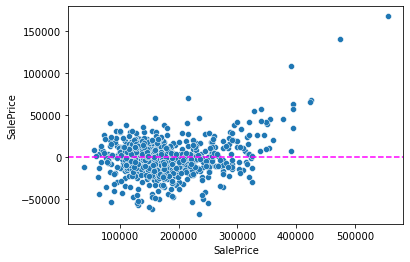

In [17]:
sns.scatterplot(x=y_test,y=test_prob)
plt.axhline(y=0,color='magenta',linestyle='--')

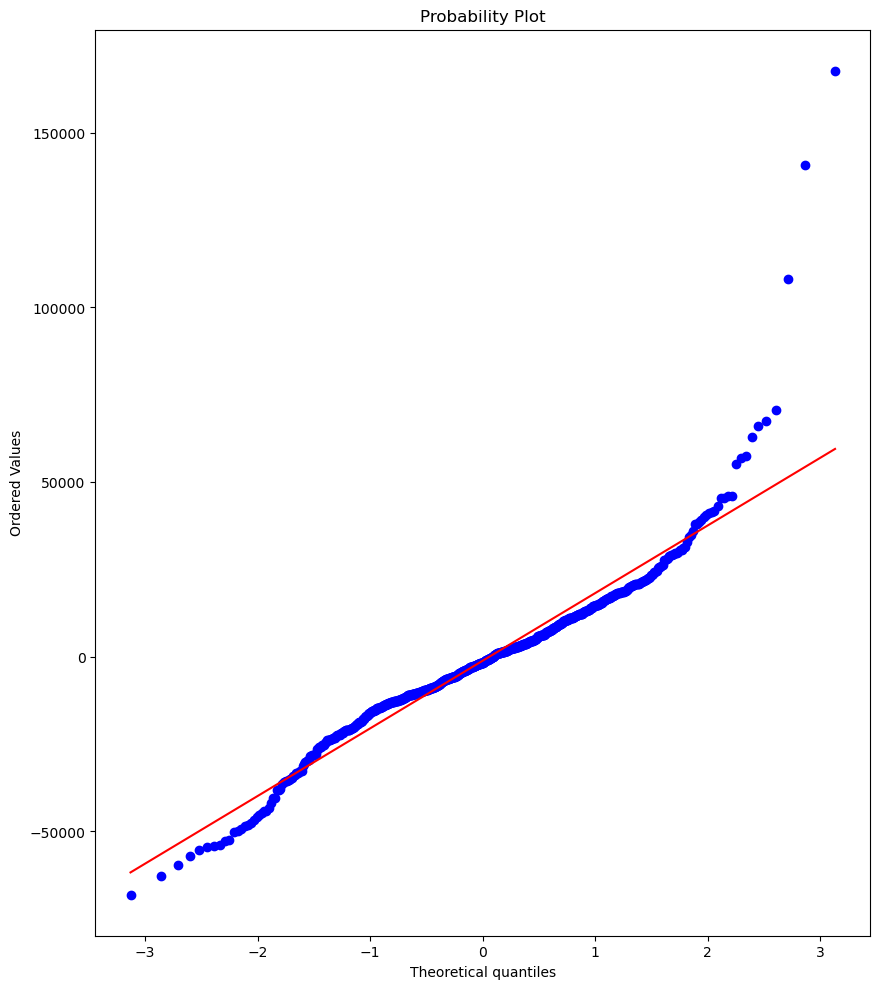

In [18]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_prob,plot=ax)

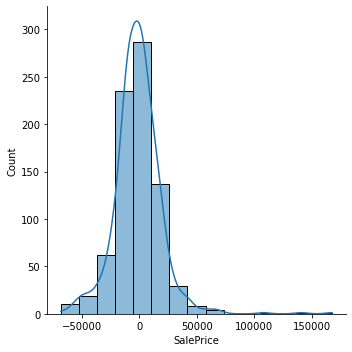

In [19]:
sns.displot(test_prob,bins=15,kde=True)

In [20]:
y

0       215000.0
1       105000.0
2       172000.0
3       244000.0
4       189900.0
          ...   
2640    142500.0
2641    131000.0
2642    132000.0
2643    170000.0
2644    188000.0
Name: SalePrice, Length: 2645, dtype: float64

In [21]:
100*RMSE/df['SalePrice'].mean()

11.666498568636591

In [22]:
y_hat = grid_model.predict(X)

<AxesSubplot:ylabel='SalePrice'>

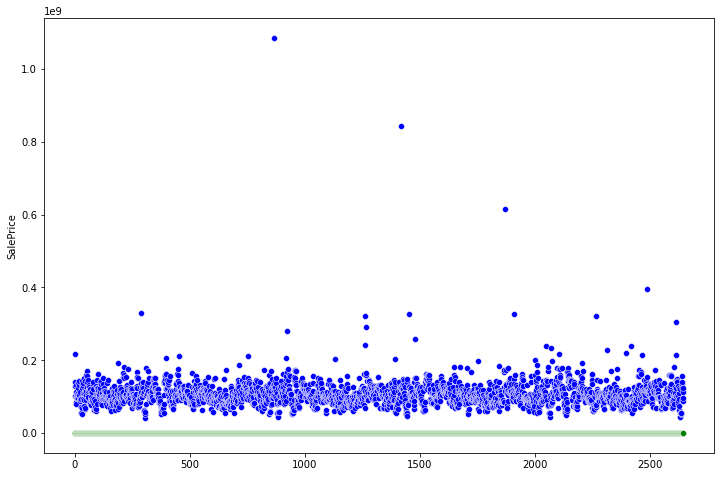

In [23]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(y_hat)),y=y_hat,color='blue')
sns.scatterplot(x=range(len(y)),y=y,color='green')

<AxesSubplot:ylabel='SalePrice'>

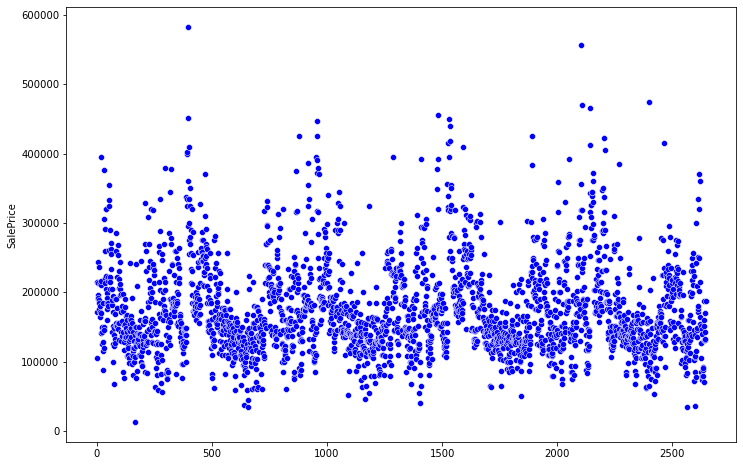

In [24]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(y)),y=y,color='blue')

# save model

In [25]:
dump(scaler,"Ames_Housing_scaler.pkl")

['Ames_Housing_scaler.pkl']

In [26]:
dump(grid_model,"Ames_Housing_model.h5")

['Ames_Housing_model.h5']

# Ridge model

In [27]:
ridge_model = Ridge(alpha=10)

In [28]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [29]:
pred_test_ridge = ridge_model.predict(X_test)

In [30]:
pred_test_ridge

array([218698.96855128, 178324.45995224, 134884.88102979, 192342.76812032,
       151740.94702806, 148001.04352552, 217530.47315125, 119139.99499244,
       185491.99019217, 172261.10076344, 147077.08403289, 175450.53620714,
       179219.7274036 , 196069.62631773, 139821.21534858, 134701.82410917,
       288776.73035297, 148448.30517535, 135159.9852003 , 222683.56205953,
       181680.42001571, 156629.64622832, 204728.19297513, 162701.09127937,
       308871.09227759, 239761.94375006, 163431.50213854, 186481.58017641,
       167902.5553539 , 113821.16215758, 306444.062786  , 309103.08733964,
        71821.74845424, 273162.79023932, 225127.18233932,  62466.86782673,
       105821.47329629, 295690.50087804, 145445.45940073, 167842.38465116,
       219956.75380738, 108585.95360267, 183856.29676989, 178279.63417638,
       197388.05661627, 229683.18777998, 135719.65373092, 230963.22843261,
       107102.7239556 , 219357.29807881, 173077.43006382,  93810.62578614,
       184145.65339193, 2

In [31]:
MAE_ridge = mean_absolute_error(y_test,pred_test_ridge)
MSE_ridge = mean_squared_error(y_test,pred_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

In [32]:
MAE_ridge

14423.702479749287

In [33]:
MSE_ridge

428523677.7037369

In [34]:
RMSE_ridge

20700.813455121443

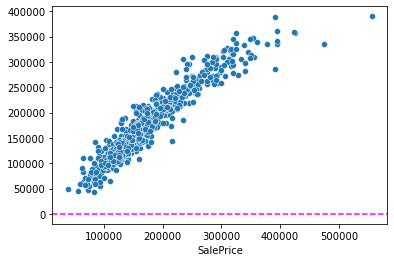

In [35]:
sns.scatterplot(x=y_test,y=pred_test_ridge)
plt.axhline(y=0,color='magenta',linestyle='--')

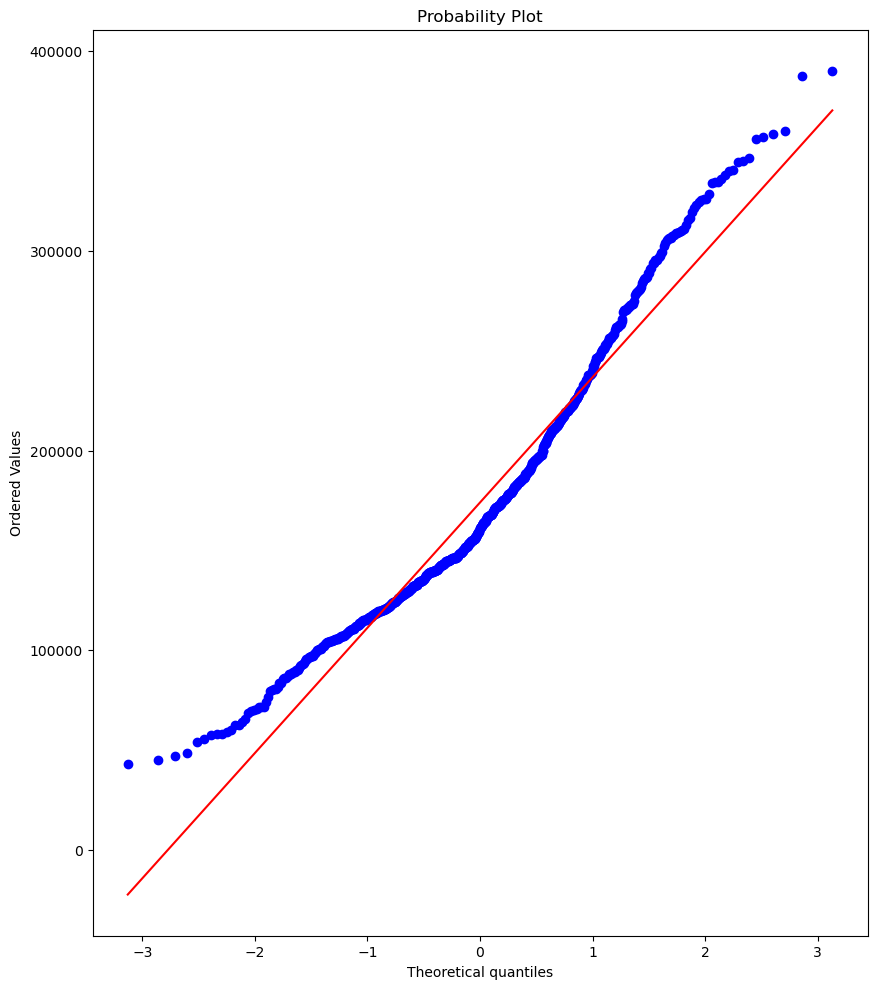

In [36]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_ridge,plot=ax)

In [50]:
100*RMSE_ridge/df['SalePrice'].mean()

11.888020102027847

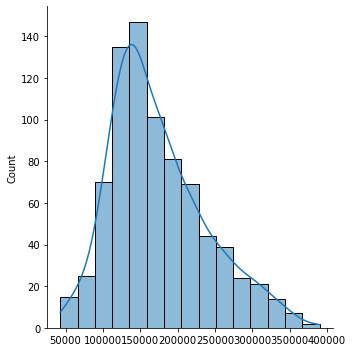

In [37]:
sns.displot(pred_test_ridge,bins=15,kde=True)

# Lasso model

In [38]:
lasso_model = Lasso(alpha=10)

In [39]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=10)

In [40]:
pred_test_lasso = lasso_model.predict(X_test)

In [41]:
pred_test_lasso

array([218842.99640841, 178324.89292025, 134734.25915141, 191635.7364881 ,
       151735.0337123 , 148384.548074  , 217435.02843646, 118347.20973913,
       185644.86708343, 172414.57820717, 146329.15452169, 175700.90098957,
       178939.80802249, 195758.58509361, 140023.85567748, 134307.48706471,
       289184.90069913, 148973.66874506, 134966.95282236, 222693.49476555,
       181588.28222603, 156234.81877871, 205017.32104446, 162329.58422065,
       308746.03678838, 240093.2960326 , 162558.78628098, 186323.33146336,
       167694.12783061, 114091.88412619, 309846.81142578, 308496.03030584,
        71564.33122695, 272790.2579709 , 225036.7120317 ,  61761.23491443,
       106203.04852439, 295628.78308608, 145650.04556101, 167887.85426866,
       219745.86438648, 108419.67756022, 183924.33102655, 178097.02006112,
       197193.31260539, 230125.77333836, 136113.60149397, 230913.23222115,
       107187.50456777, 219283.69831234, 173146.63475707,  93763.65265084,
       184159.50099485, 2

In [42]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [43]:
MAE_Lasso

14426.08975576857

In [44]:
MSE_Lasso

428079294.65291

In [45]:
RMSE_Lasso

20690.07720268124

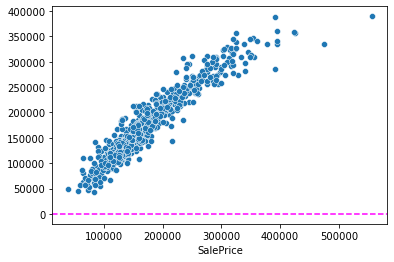

In [46]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

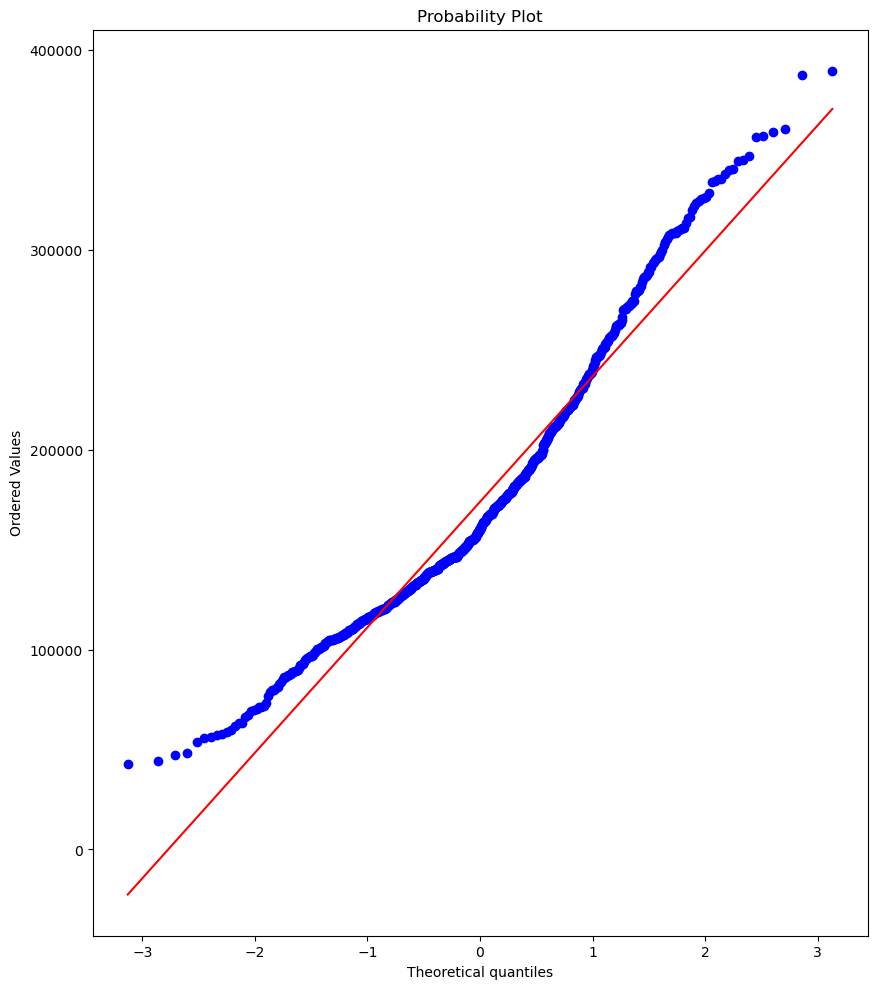

In [47]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

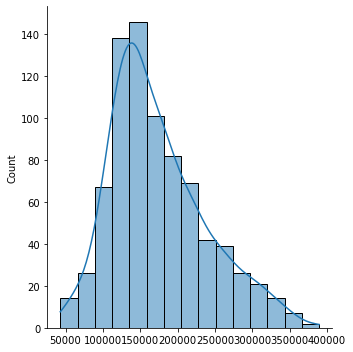

In [48]:
sns.displot(pred_test_lasso,bins=15,kde=True)

In [49]:
100*RMSE_Lasso/df['SalePrice'].mean()

11.881854509303373